# Demo 3: Classification with Naivebayes model

# Read Data

In [1]:
from sklearn import datasets

In [2]:
# Load data
digits = datasets.load_digits()

## Task 1: Visuallization
Visualiza some images (X) of digit with their label (y)

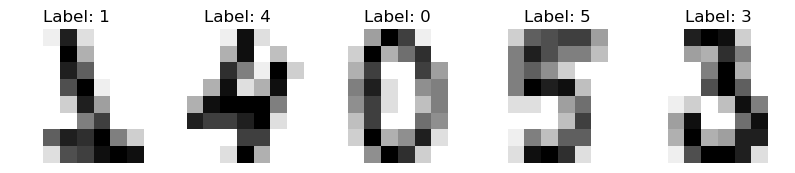

In [4]:
import matplotlib.pyplot as plt

start_index = 1000

_,axes = plt.subplots(nrows=1,ncols=5,figsize = (10,3))
for ax, image, label in zip(axes,digits.images[start_index:start_index+5],digits.target[start_index:start_index+5]):
    ax.set_axis_off()
    ax.imshow(image,cmap = plt.cm.gray_r,interpolation="nearest")
    ax.set_title("Label: %i" % label)


## Task 2: Training the model
-   In this task we will work with the NaiveBayes model. In order to create an NaiverBayes classifier we have to consider the distribution of $P(x_i|y)$.
-   In this task we will work with some different distributions: Gaussian Naive Bayes, Multinomial Naive Bayes, Bernoulli Naive Bayes,...
-   References: [https://scikit-learn.org/stable/modules/naive_bayes.html](Different distributions)


### Task 2.1: Gaussian Naive Bayes


In [5]:
from sklearn import naive_bayes

In [12]:
# Create a Naive Bayes model with Gaussian distribution (Normal distribution).
gNB = naive_bayes.GaussianNB()

In [7]:
# Preparing data dor training gNB model
## Flatten array images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples,-1))
print(data.shape)

(1797, 64)


In [8]:
print(data.max())
print(data.min())

16.0
0.0


In [9]:
# Data normalization
X = data/16
y = digits.target

In [13]:
## Train test split:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=False)


In [14]:
## Training data with X_train,y_train
gNB.fit(X_train,y_train)
pred_test_gNB = gNB.predict(X_test)

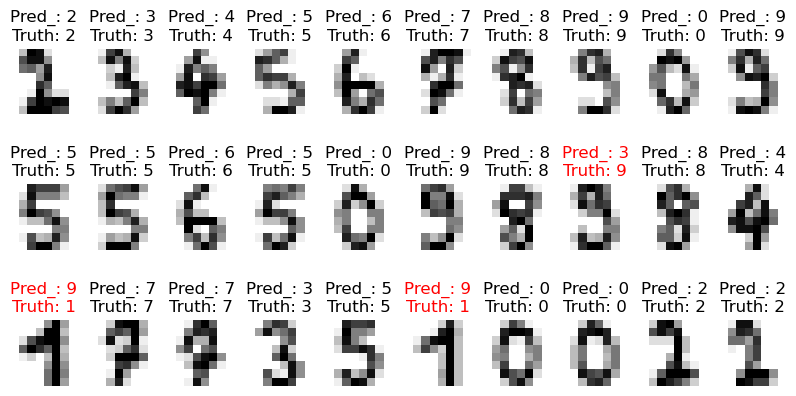

In [54]:
# Visualize the first 30 test samples and show their predicted digit value in the title.
_,axes = plt.subplots(nrows = 3,ncols = 10, figsize= (10,5))
for r in range(3):
    for c in range(10):
        index = r*10 + c
        axes[r,c].set_axis_off()
        image = X_test[index].reshape((8,8))
        pred_label = pred_test_gNB[index]
        true_label = y_test[index]
        axes[r,c].imshow(image, cmap = plt.cm.gray_r, interpolation = "nearest")
        if pred_label == true_label:
            axes[r,c].set_title(f"Pred_: {pred_label}\nTruth: {true_label}")
        else:
            axes[r,c].set_title(f"Pred_: {pred_label}\nTruth: {true_label}",color = 'red')

In [25]:
# Classification report:
from sklearn import metrics
print(f"Classification report for classifier {gNB}:\n"
      f"{metrics.classification_report(y_test,pred_test_gNB,digits=4)}\n")

Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0     0.9714    0.9714    0.9714        35
           1     0.6757    0.6944    0.6849        36
           2     0.9655    0.8000    0.8750        35
           3     0.9565    0.5946    0.7333        37
           4     0.9688    0.8378    0.8986        37
           5     0.8000    0.9730    0.8780        37
           6     0.9730    0.9730    0.9730        37
           7     0.6531    0.8889    0.7529        36
           8     0.6154    0.7273    0.6667        33
           9     0.7353    0.6757    0.7042        37

    accuracy                         0.8139       360
   macro avg     0.8315    0.8136    0.8138       360
weighted avg     0.8333    0.8139    0.8148       360




Confusion matrix:
[[34  0  0  0  1  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  4  7]
 [ 0  3 28  0  0  0  1  0  1  2]
 [ 0  1  0 22  0  4  0  3  7  0]
 [ 0  0  0  0 31  0  0  5  1  0]
 [ 0  1  0  0  0 36  0  0  0  0]
 [ 0  1  0  0  0  0 36  0  0  0]
 [ 0  0  1  0  0  1  0 32  2  0]
 [ 0  5  0  0  0  1  0  3 24  0]
 [ 1  1  0  1  0  3  0  6  0 25]]


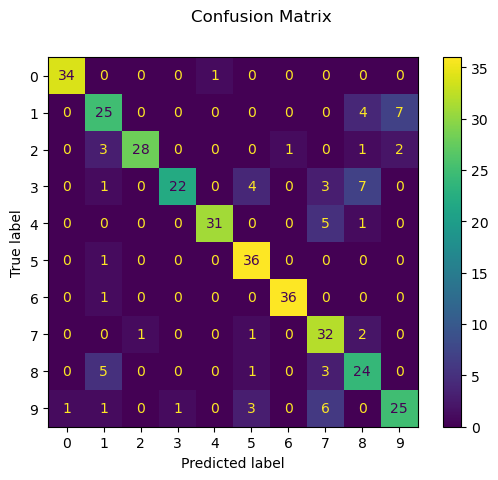

In [24]:
# Confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,pred_test_gNB)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

What information do we have from plot of confusion matrix:
-   From second row of Confusion Matrix we have:
    -   Total number of sample of class 1 in our test dataset is  : 25 + 4 + 7 = 36 samples
    -   Our gNB model predict correctly 25 samples of class 1 and uncorrectly 11 samples
    -   There are 4 samples in class 1 that our gNB model predict uncorredtly in class 8
    -   There are 7 samples in class 1 that out gNB model predict uncorredtly in class 9
-   ....


## Task 3: Comparision of different 

In [27]:
report = metrics.classification_report(y_test,pred_test_gNB,digits = 4,output_dict = True)
print(report["macro avg"])
print(report["weighted avg"])

{'precision': 0.8314606158108436, 'recall': 0.8136088686088687, 'f1-score': 0.8138099084959611, 'support': 360}
{'precision': 0.8332673912852567, 'recall': 0.8138888888888889, 'f1-score': 0.814756304585172, 'support': 360}


In [28]:
# There are some metric for evaluation performance of model
def evaluation_model(model,
                     X_train,
                     y_train,
                     X_test,
                     y_test):
    model.fit(X_train,y_train)
    pred_test = model.predict(X_test)
    report = metrics.classification_report(y_test,pred_test,digits = 4, output_dict = True)
    return (report['macro avg'],report['weighted avg'])

### Create a dict to store results from different distribution model

In [50]:
marco_avg_all = {}
weighted_avg_all = {}
models = [naive_bayes.GaussianNB(),
          naive_bayes.MultinomialNB(),
          naive_bayes.BernoulliNB(),
          naive_bayes.ComplementNB(),
          naive_bayes.CategoricalNB()]
distributions = ["Gaussian",
                 "Multinomial",
                 "Bernoulli",
                 "Complement",
                 "Categorical"]
for i in range(len(models)):
    result = evaluation_model(model=models[i],
                              X_train=X_train,
                              y_train=y_train,
                              X_test=X_test,
                              y_test=y_test)
    marco_avg_all[distributions[i]] = result[0]
    weighted_avg_all[distributions[i]] = result[1]


In [51]:
print(list(marco_avg_all["Complement"].keys()))

['precision', 'recall', 'f1-score', 'support']


In [45]:
import numpy as np
marco_avg_all["Gaussian"].values()

dict_values([0.8314606158108436, 0.8136088686088687, 0.8138099084959611, 360])

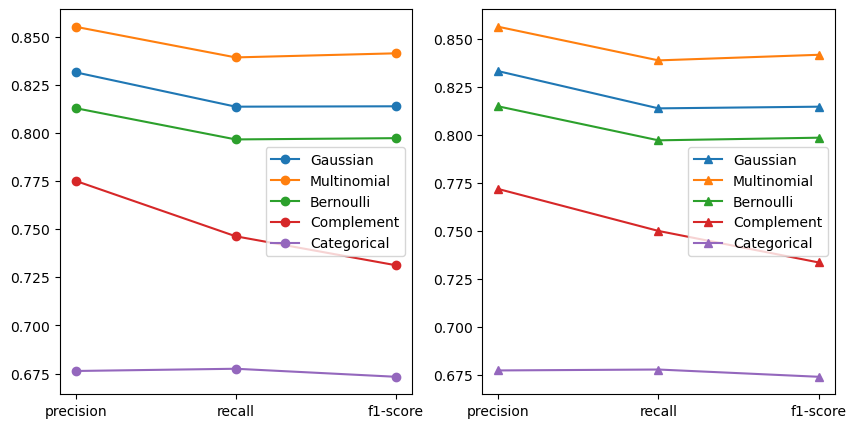

In [52]:
# Plot results
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
X = list(marco_avg_all["Gaussian"].keys())[:3]
fig,axes = plt.subplots(nrows = 1, ncols = 2,
                      figsize = (10,5))
for type in distributions:
    axes[0].plot(X,
                   np.array([i for i in marco_avg_all[type].values()])[:3],
                   marker = 'o',
                   label = type)
    axes[1].plot(X,
                   np.array([i for i in weighted_avg_all[type].values()])[:3],
                   marker = "^",
                   label = type)
axes[0].legend(frameon = True)
axes[1].legend(frameon = True)
plt.show()


# Select the best model
-   Multinomial Naive Bayes